##Exp 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("walmart_dataset_eda.csv")

In [ ]:
df.shape

(6435, 8)

In [ ]:
df.head(5)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [ ]:
df.tail(5)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667

In [ ]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [ ]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [ ]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')

<AxesSubplot:>

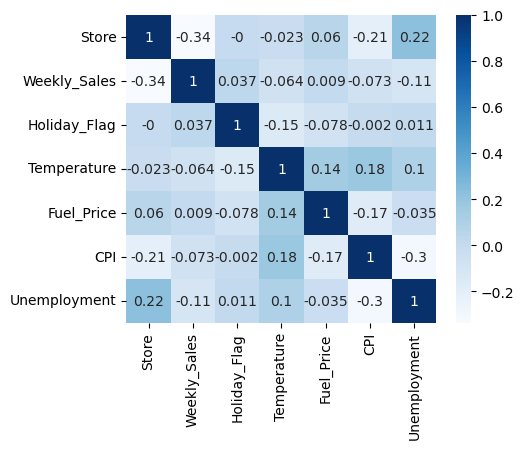

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(round(df.corr(),3),cmap='Blues',annot=True)

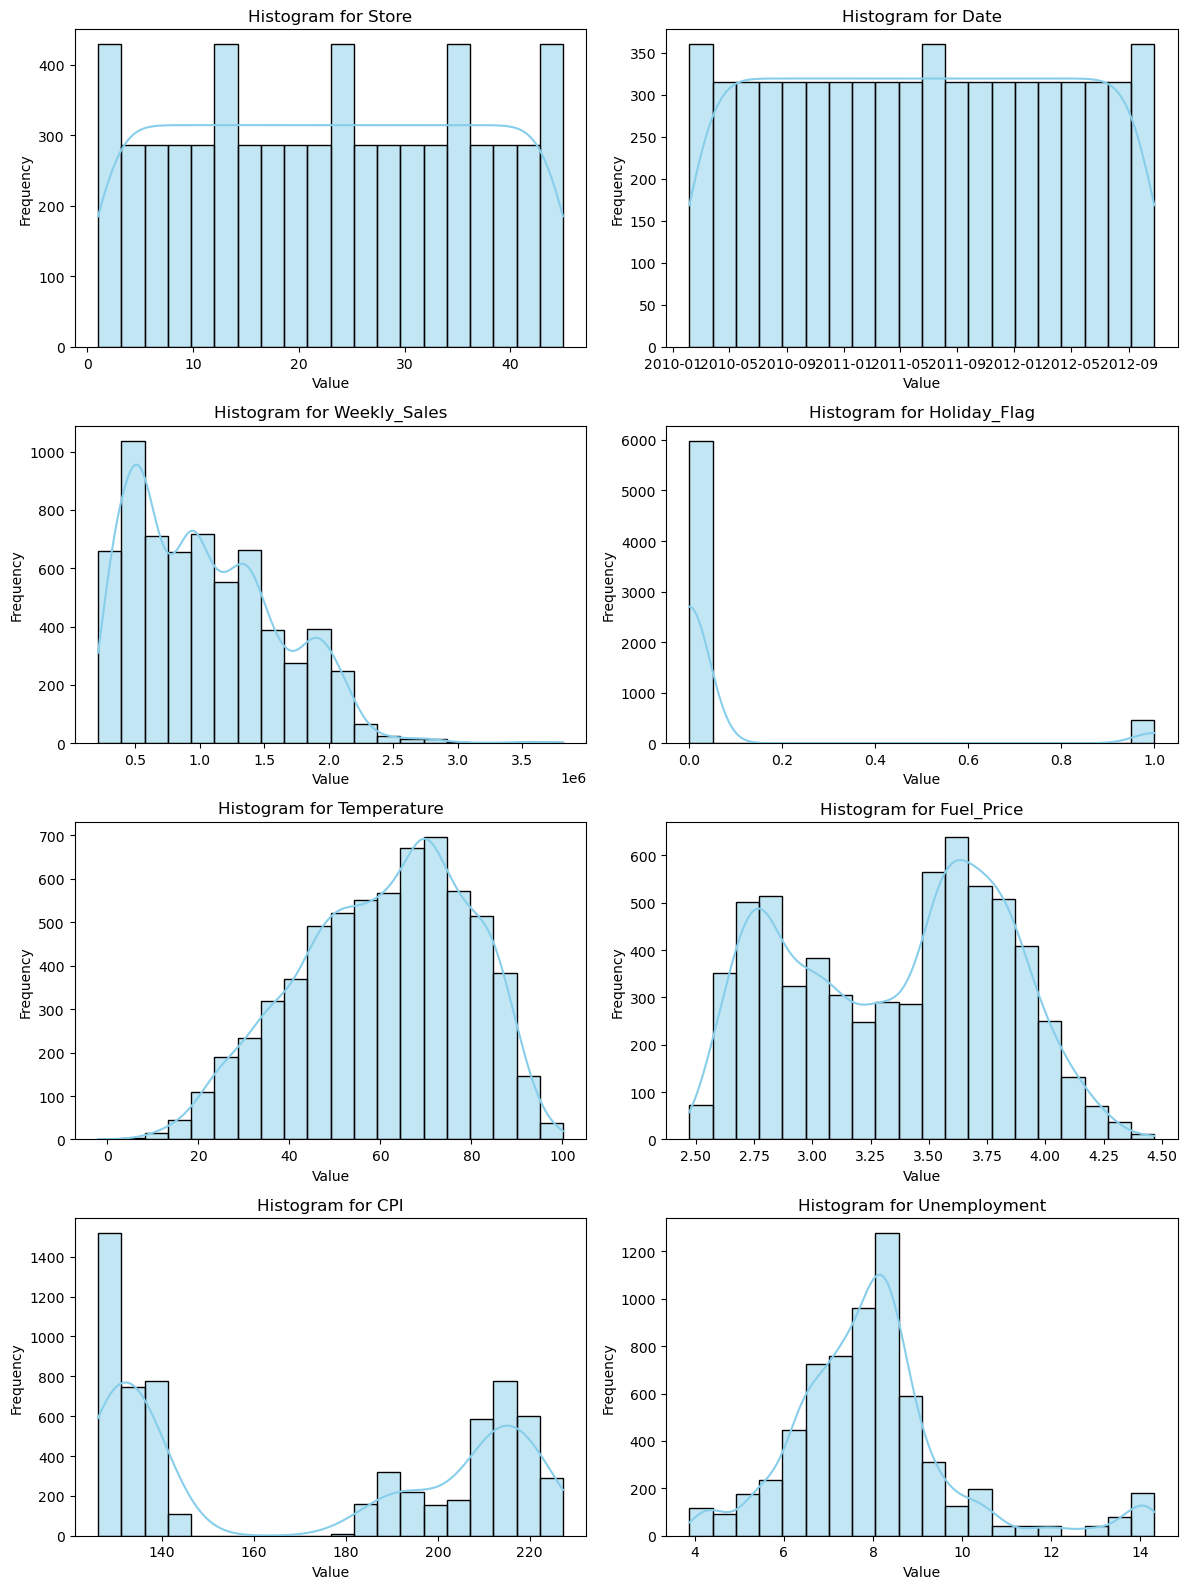

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(df[column], ax=axes[i], bins=20, kde=True, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
df.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(9, 5)
)
plt.subplots_adjust(wspace=0.5)
plt.show()

In [ ]:
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

k = 1.5

outliers = (df['Weekly_Sales'] < (Q1 - k * IQR)) | (df['Weekly_Sales'] > (Q3 + k * IQR))

df_cleaned = df[~outliers]

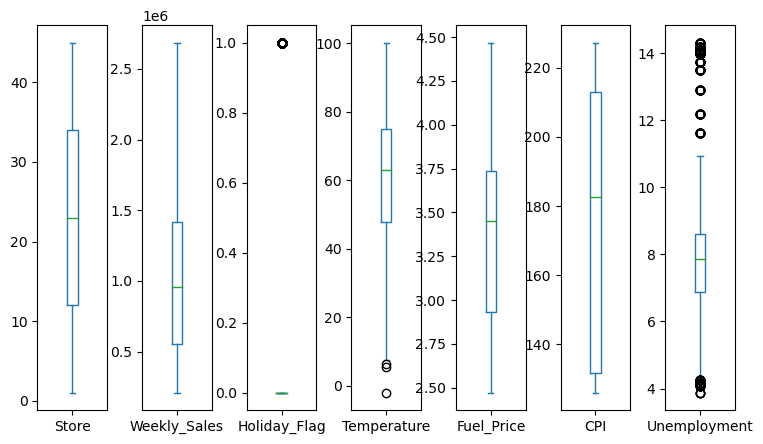

In [ ]:
df_cleaned.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(9, 5)
)
plt.subplots_adjust(wspace=0.5)
plt.show()

<Figure size 1000x700 with 0 Axes>

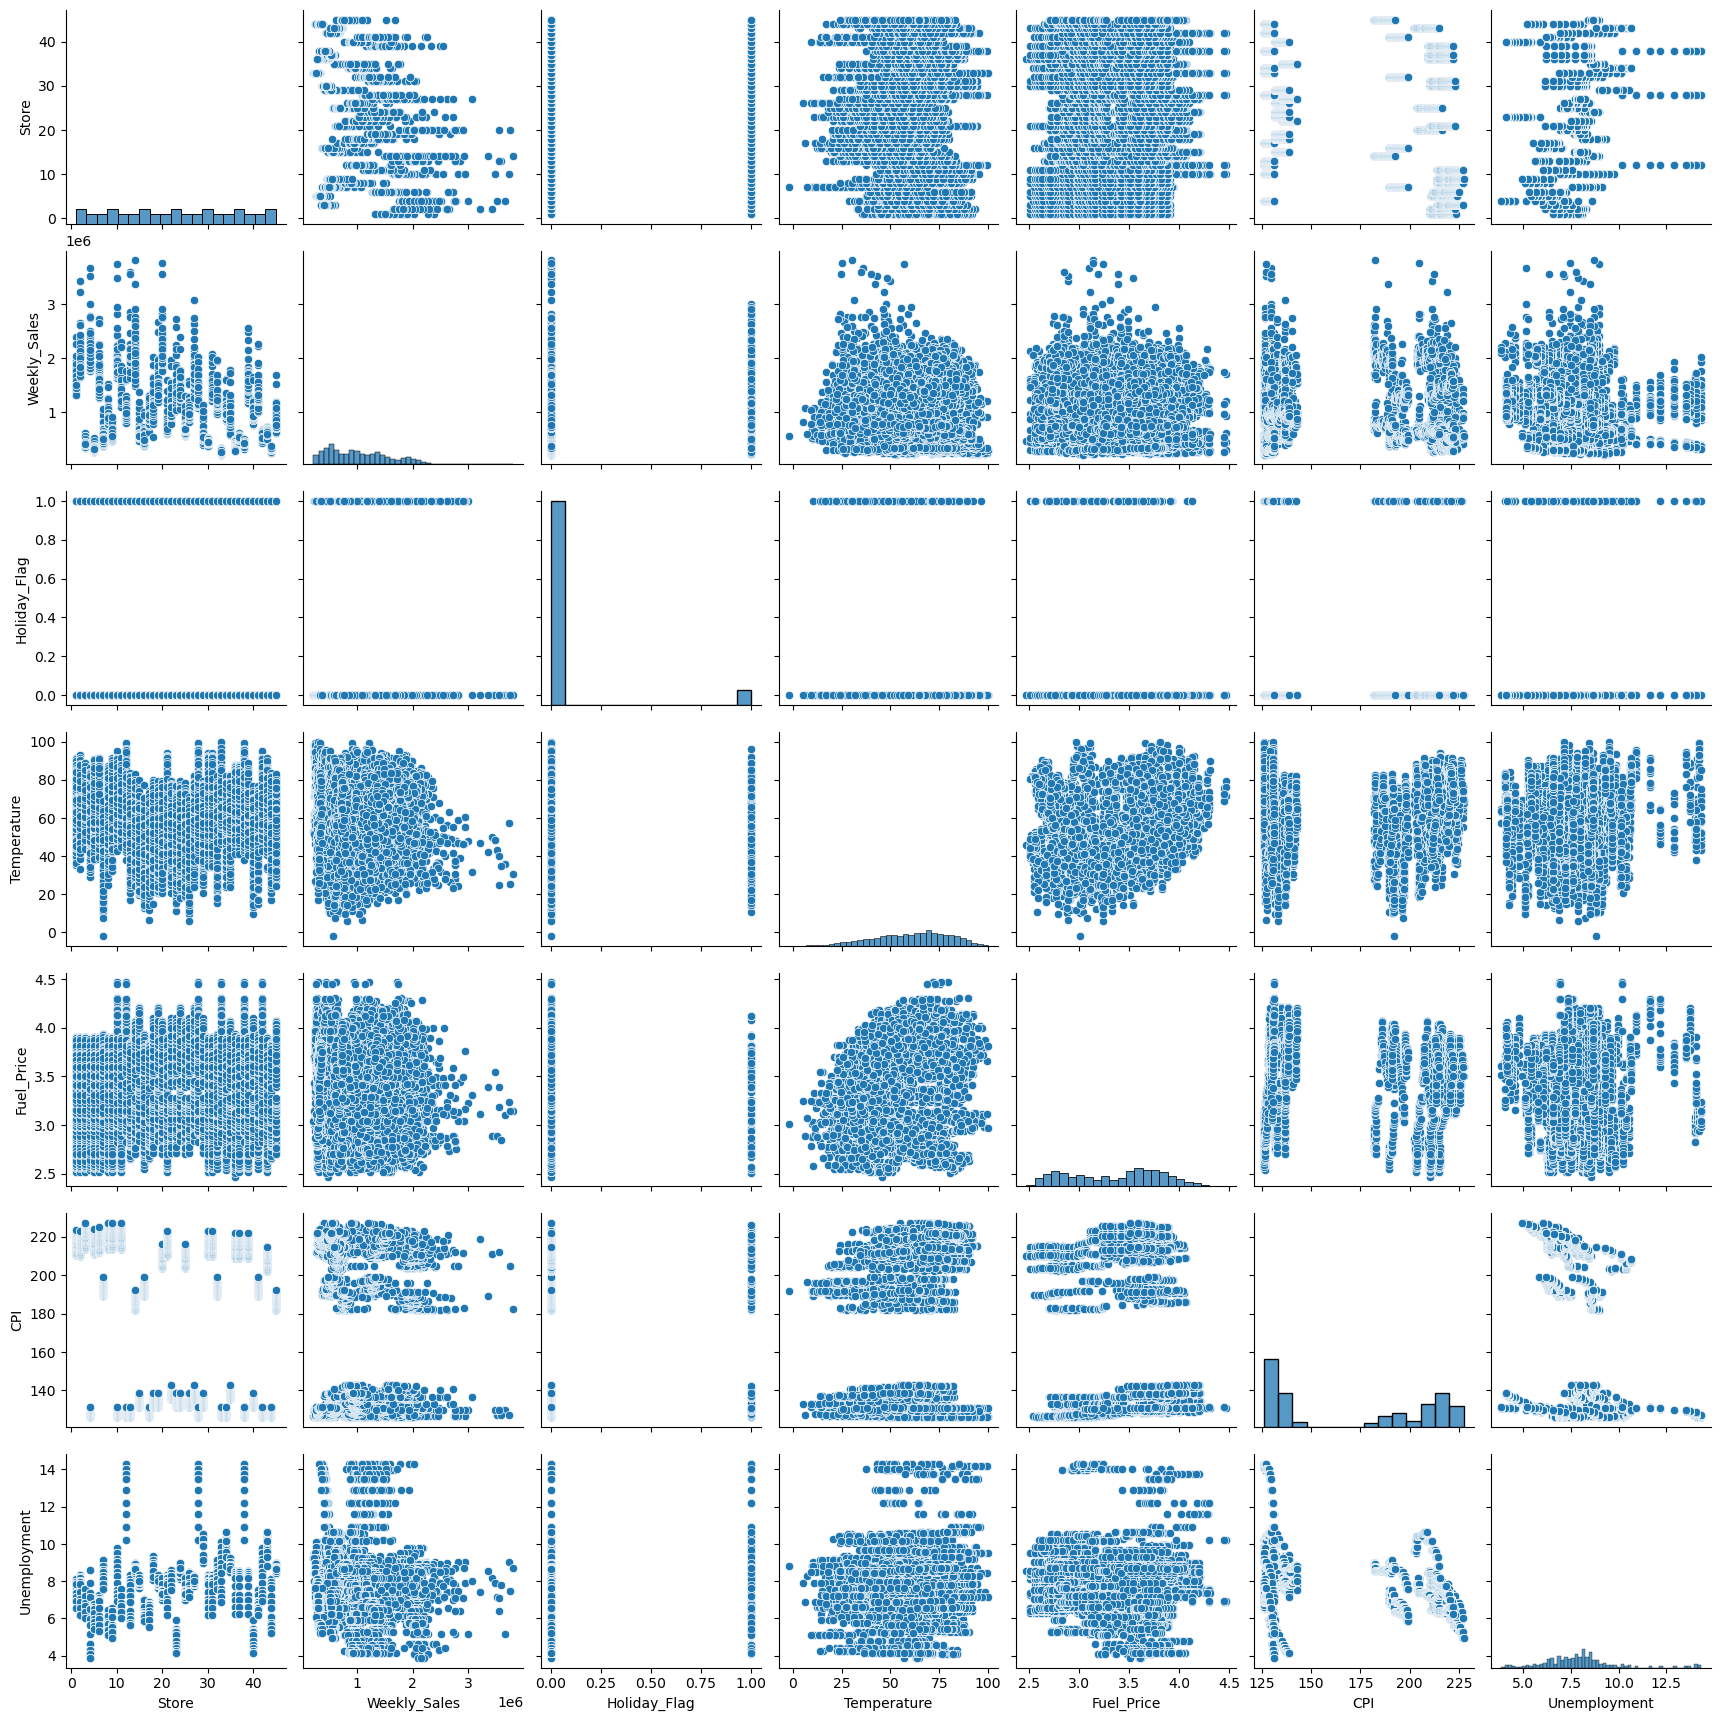

In [ ]:
plt.figure(figsize=(10,7))
sns.pairplot(df)

<AxesSubplot:xlabel='Date'>

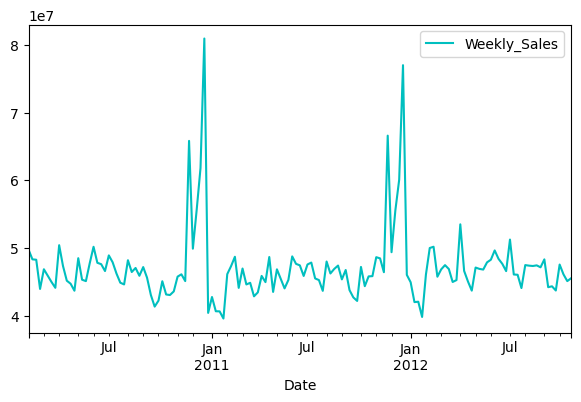

In [ ]:
df.groupby('Date')[['Weekly_Sales']].sum().plot(color= 'c', figsize= (7,4))

<AxesSubplot:xlabel='Fuel_Price'>

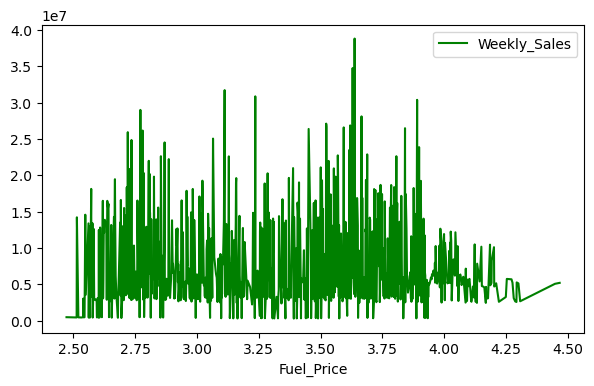

In [ ]:
df.groupby('Fuel_Price')[['Weekly_Sales']].sum().plot(color= 'g', figsize= (7,4))

<AxesSubplot:xlabel='Date'>

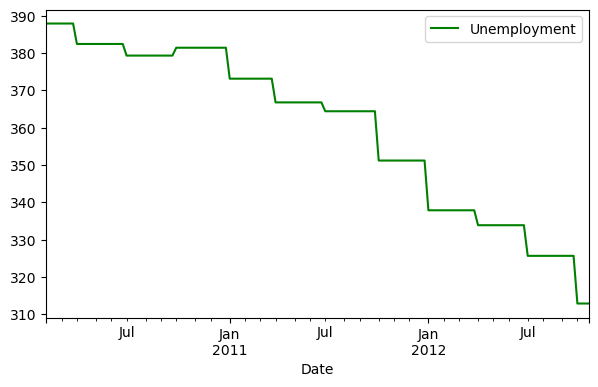

In [ ]:
df.groupby('Date')[['Unemployment']].sum().plot(c='g',figsize=(7,4))

##Exp 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('argentina.csv')
df

province           gdp  illiteracy    poverty  deficient_infra  \
0          Buenos Aires  2.926899e+08    1.383240   8.167798         5.511856   
1             Catamarca  6.150949e+06    2.344140   9.234095        10.464484   
2               Córdoba  6.936374e+07    2.714140   5.382380        10.436086   
3            Corrientes  7.968013e+06    5.602420  12.747191        17.438858   
4                 Chaco  9.832643e+06    7.517580  15.862619        31.479527   
5                Chubut  1.774785e+07    1.548060   8.051752         8.044618   
6            Entre Ríos  2.074341e+07    3.185580   7.288751        18.794568   
7               Formosa  3.807057e+06    4.610640  17.035583        28.004985   
8                 Jujuy  6.484938e+06    2.151390  13.367965        12.483179   
9              La Pampa  6.990262e+06    1.539300   3.398774        16.505714   
10             La Rioja  5.590516e+06    2.773210  10.875152         7.403254   
11              Mendoza  3.343137e+07    2.200200   5.692798         3.839852   
12             Misiones  9.646826e+06    6.863950  13.529788         8.325740   
13              Neuquén  2.256411e+07    1.943750   9.456635        11.267278   
14            Río Negro  1.026458e+07    2.031420   8.678391        14.885444   
15                Salta  1.343883e+07    3.346090  16.870500        14.182303   
16             San Juan  8.262309e+06    2.963260   9.050784         3.914390   
17             San Luis  1.178085e+07    3.433650   6.593771         9.679894   
18           Santa Cruz  1.166374e+07    0.791485   8.024762         7.411364   
19             Santa Fe  8.158869e+07    1.975940   6.081012        11.869195   
20  Santiago del Estero  8.387859e+06    6.272090  11.759000        20.491433   
21              Tucumán  1.385620e+07    3.770370  11.214239         6.466665   

    school_dropout  no_healthcare  birth_mortal       pop  \
0         0.766168        48.7947           4.4  15625084   
1         0.951963        45.0456           1.5    367828   
2         1.035056        45.7640           4.8   3308876   
3         3.864265        62.1103           5.9    992595   
4         2.577462        65.5104           7.5   1055259   
5         0.586309        39.5473           3.0    509108   
6         1.887188        48.6571           3.1   1235994   
7         2.268974        65.8126          16.2    530162   
8         0.721295        54.1615           3.7    673307   
9         0.204093        45.4764           7.2    318951   
10        3.844949        40.8341          11.4    333642   
11        1.063718        50.5843           4.4   1738929   
12        3.129124        57.8339           8.1   1101593   
13        1.393504        48.7431           3.3    551266   
14        0.408042        49.9463           0.8    638645   
15        1.482030        60.4230           5.8   1214441   
16        3.298413        52.9684           4.2    681055   
17        2.000172        51.6154           3.8    432310   
18        0.289262        29.2321           3.3    273964   
19        2.872181        41.9660           2.6   3194537   
20        2.325598        63.6637           1.7    874006   
21        0.977285        48.2242           3.0   1448188   

    movie_theatres_per_cap  doctors_per_cap  
0                 0.000006         0.004836  
1                 0.000005         0.004502  
2                 0.000011         0.010175  
3                 0.000004         0.004495  
4                 0.000003         0.003605  
5                 0.000016         0.004498  
6                 0.000006         0.004679  
7                 0.000004         0.003440  
8                 0.000003         0.003958  
9                 0.000019         0.005415  
10                0.000012         0.005092  
11                0.000008         0.005720  
12                0.000002         0.002880  
13                0.000009         0.005067  
14                0.000009         0.004898  
15         

In [ ]:
features_orig = ['gdp', 'illiteracy', 'poverty', 'deficient_infra',
                 'school_dropout', 'no_healthcare', 'birth_mortal', 'pop',
                 'movie_theatres_per_cap', 'doctors_per_cap']

In [ ]:
df[features_orig].describe()

gdp  illiteracy    poverty  deficient_infra  school_dropout  \
count  2.200000e+01   22.000000  22.000000        22.000000       22.000000   
mean   3.055703e+07    3.225541   9.925625        12.677304        1.724866   
std    6.183100e+07    1.851496   3.779530         7.216860        1.152438   
min    3.807057e+06    0.791485   3.398774         3.839852        0.204093   
25%    8.041587e+06    1.989810   7.472754         7.569677        0.812617   
50%    1.096416e+07    2.743675   9.142440        10.865881        1.437767   
75%    1.999452e+07    3.686190  12.500143        16.100647        2.514496   
max    2.926899e+08    7.517580  17.035583        31.479527        3.864265   

       no_healthcare  birth_mortal           pop  movie_theatres_per_cap  \
count      22.000000     22.000000  2.200000e+01               22.000000   
mean       50.768836      4.986364  1.686352e+06                0.000007   
std         9.181037      3.498339  3.219828e+06                0.000004   
min        29.232100      0.800000  2.739640e+05                0.000002   
25%        45.548300      3.025000  5.143715e+05                0.000004   
50%        49.370500      4.000000  7.775305e+05                0.000006   
75%        56.915800      5.875000  1.230606e+06                0.000009   
max        65.812600     16.200000  1.562508e+07                0.000019   

       doctors_per_cap  
count        22.000000  
mean          0.004894  
std           0.001522  
min           0.002821  
25%           0.004061  
50%           0.004757  
75%           0.005334  
max           0.010175

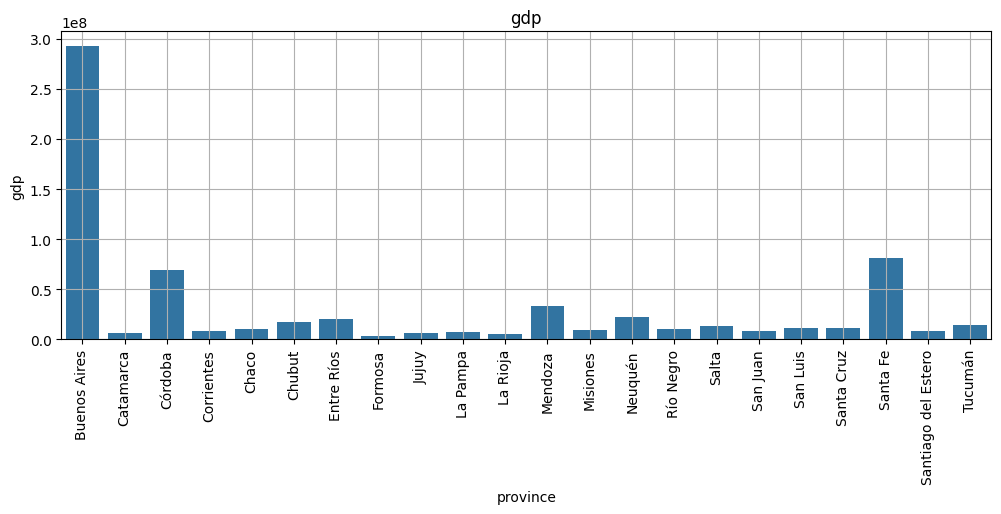

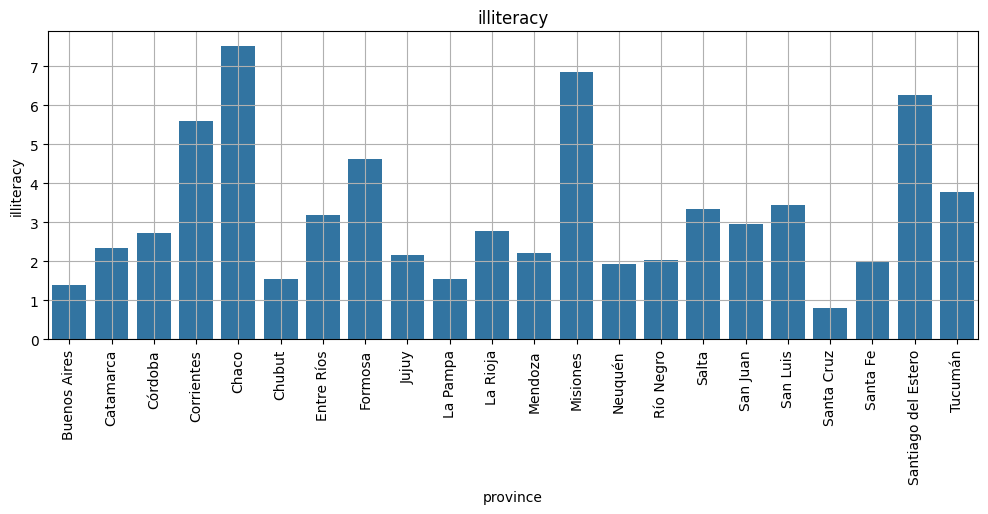

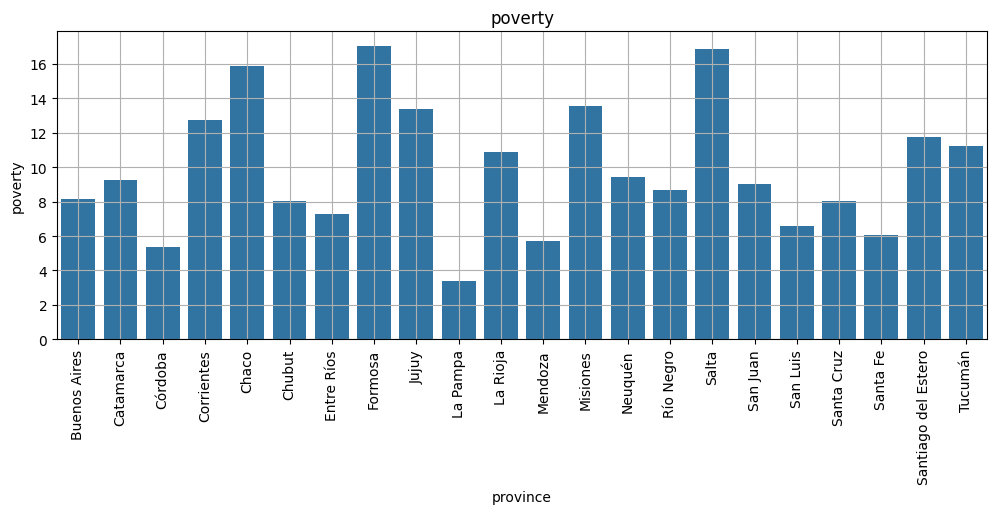

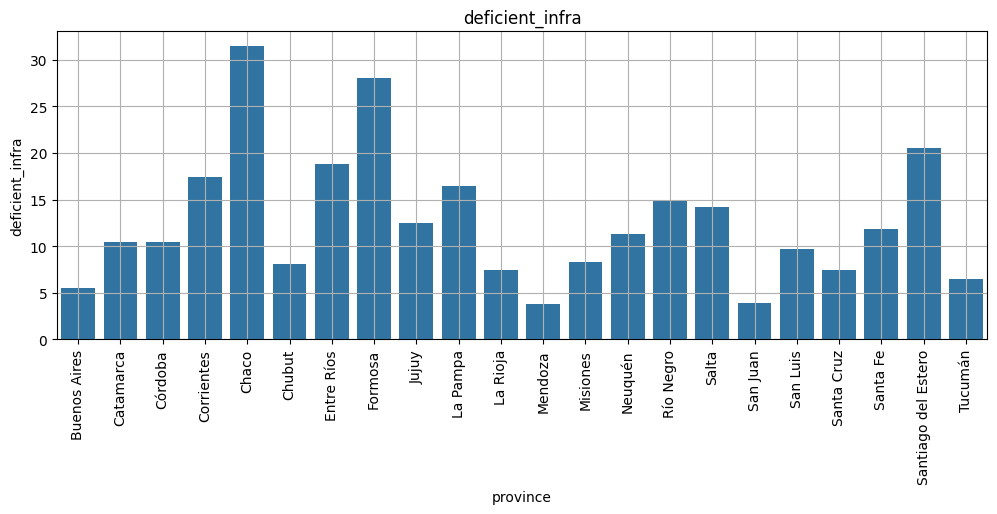

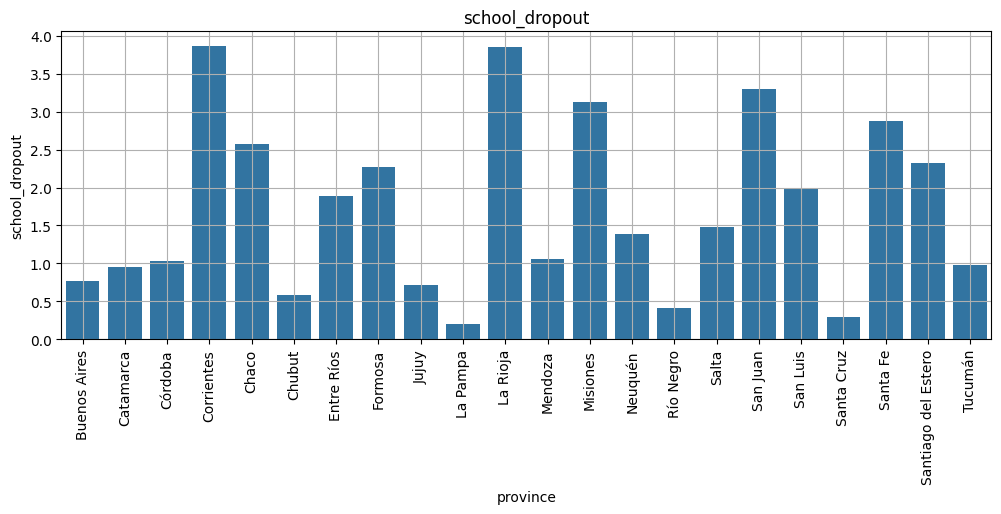

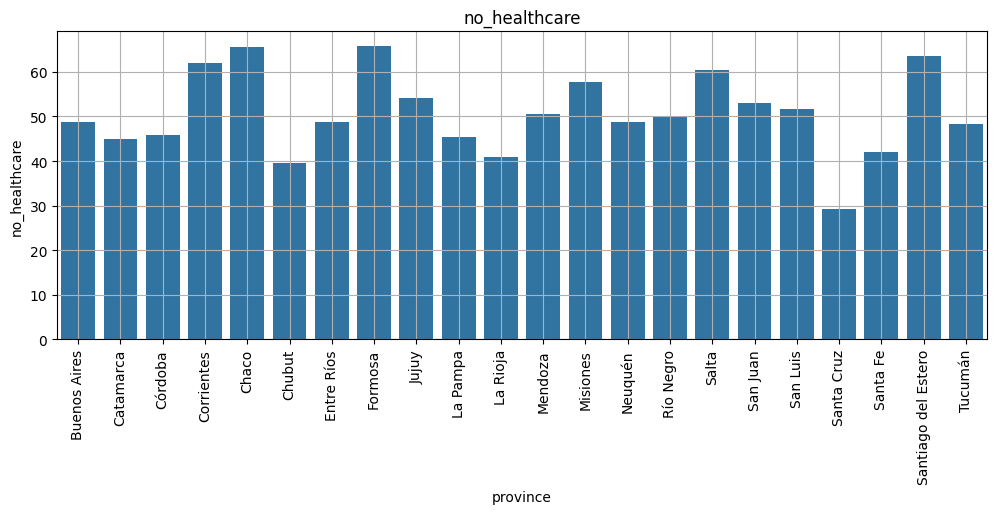

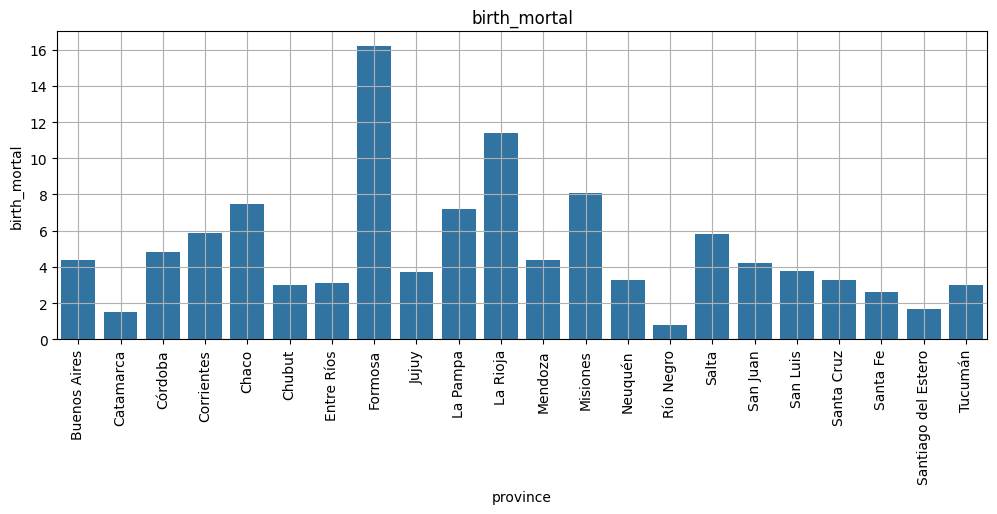

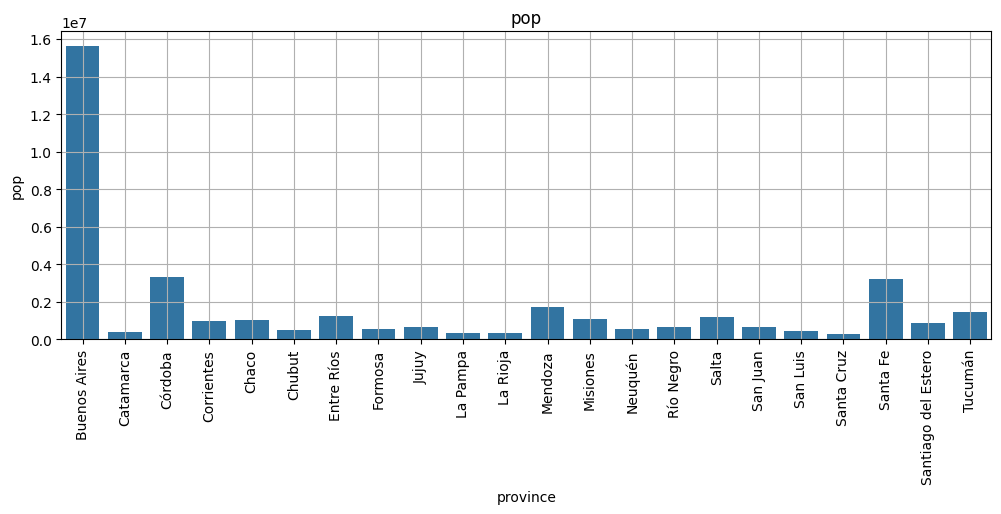

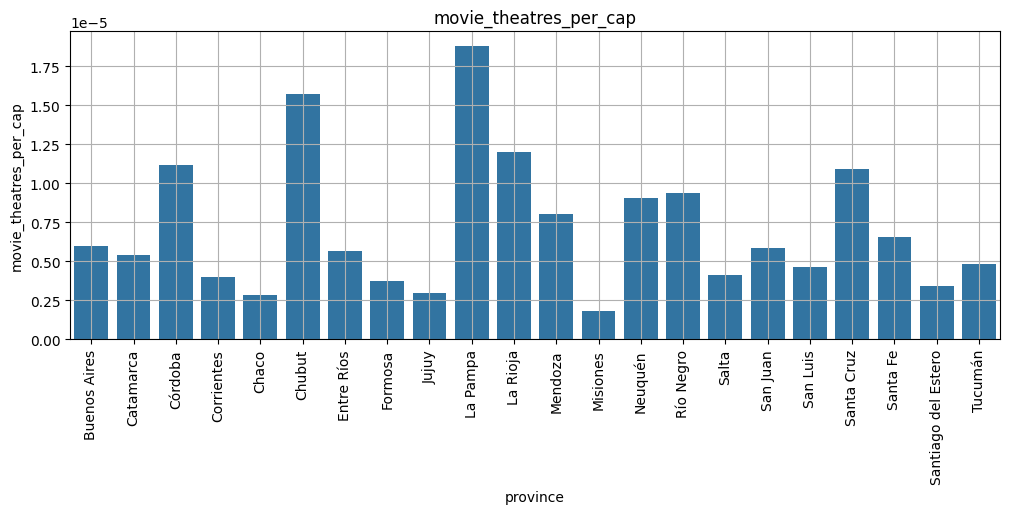

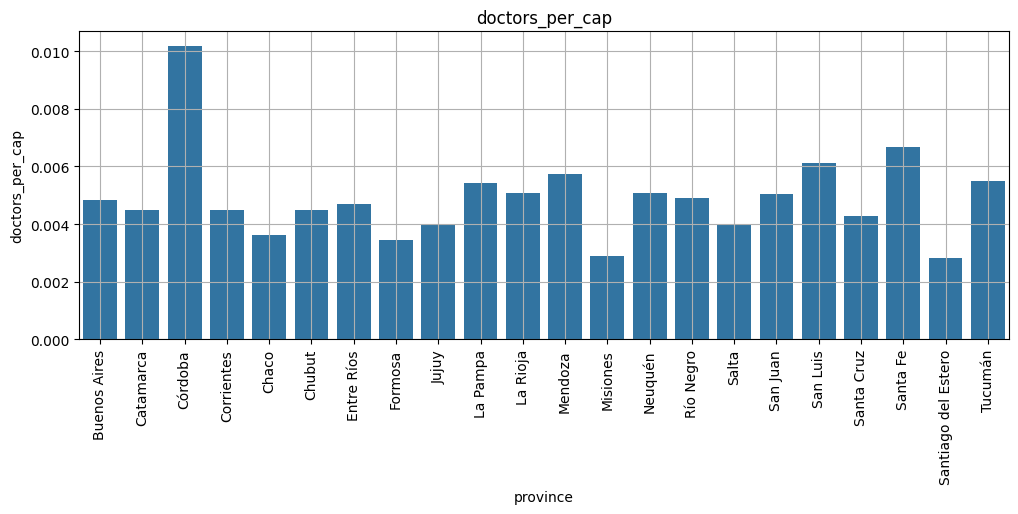

In [ ]:
for f in features_orig:
    fig = plt.figure(figsize = (12,4))
    sns.barplot(x='province', y=f, data=df)
    plt.xticks(rotation=90)
    plt.grid()
    plt.title(f)
    plt.show()

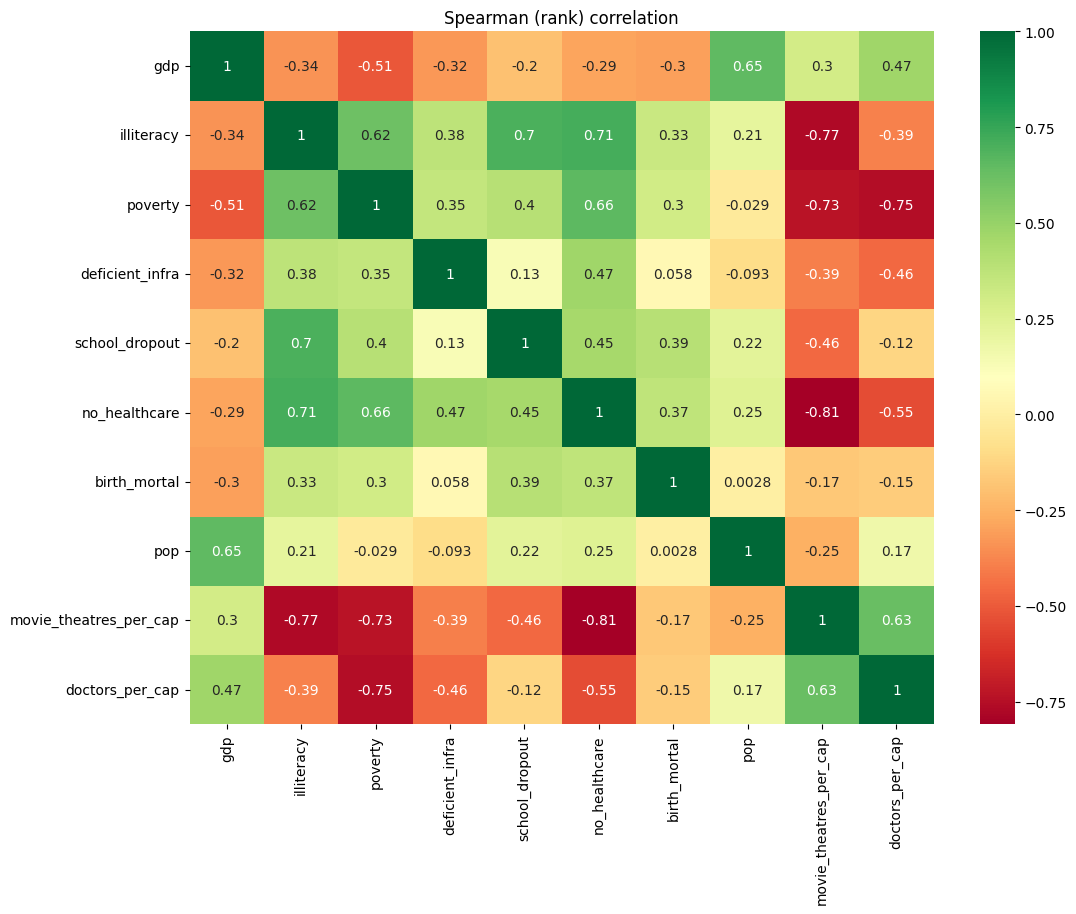

In [ ]:
corr_mat = df[features_orig].corr(method='spearman')
fig = plt.figure(figsize = (12,9))
sns.heatmap(corr_mat, annot=True, cmap="RdYlGn")
plt.title('Spearman (rank) correlation')
plt.show()

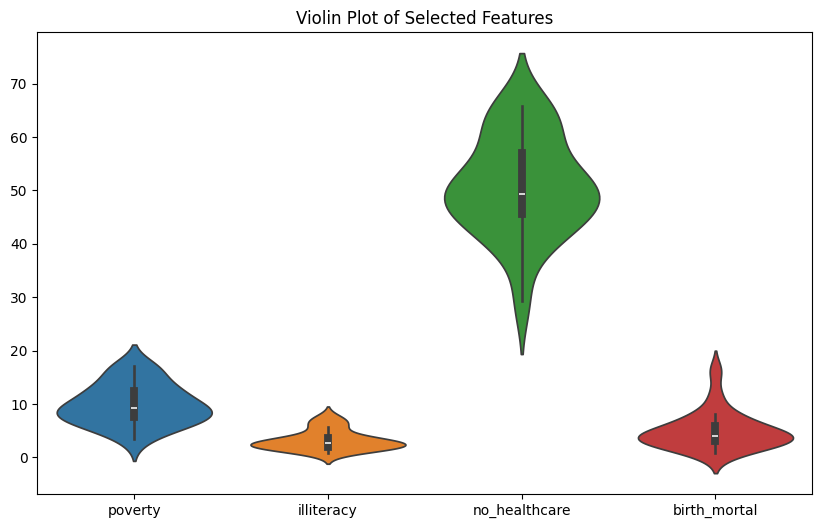

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['poverty', 'illiteracy', 'no_healthcare', 'birth_mortal']])
plt.title("Violin Plot of Selected Features")
plt.show()

In [ ]:
fig = px.scatter_3d(df, x='gdp', y='poverty', z='doctors_per_cap',
                    color='school_dropout', title="3D Scatter Plot of GDP, Poverty, and Doctors per Capita")
fig.show()

In [ ]:
fig = px.treemap(df, path=['province'], values='gdp', color='poverty',
                 hover_data={'illiteracy': True, 'birth_mortal': True},
                 title="Treemap of GDP by Province with Poverty Rate Coloring")
fig.show()

##Exp 4


In [ ]:
install.packages("plotly")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘crosstalk’




In [ ]:
library(ggplot2)
library(plotly)
library(dplyr)


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
df <- read.csv("crime_dataset_india.csv")

In [ ]:
colnames(df)

[1] "Report.Number"      "Date.Reported"      "Date.of.Occurrence"
 [4] "Time.of.Occurrence" "City"               "Crime.Code"        
 [7] "Crime.Description"  "Victim.Age"         "Victim.Gender"     
[10] "Weapon.Used"        "Crime.Domain"       "Police.Deployed"   
[13] "Case.Closed"        "Date.Case.Closed"

In [ ]:
head(df)

Report.Number Date.Reported    Date.of.Occurrence Time.of.Occurrence
1 1             02-01-2020 00:00 1-01-20            01-01-2020 01:11  
2 2             01-01-2020 19:00 1-01-20            01-01-2020 06:26  
3 3             02-01-2020 05:00 1-01-20            01-01-2020 14:30  
4 4             01-01-2020 05:00 1-01-20            01-01-2020 14:46  
5 5             01-01-2020 21:00 1-01-20            01-01-2020 16:51  
6 6             02-01-2020 03:00 1-01-20            01-01-2020 17:09  
  City      Crime.Code Crime.Description Victim.Age Victim.Gender Weapon.Used 
1 Ahmedabad 576        IDENTITY THEFT    16         M             Blunt Object
2 Chennai   128        HOMICIDE          37         M             Poison      
3 Ludhiana  271        KIDNAPPING        48         F             Blunt Object
4 Pune      170        BURGLARY          49         F             Firearm     
5 Pune      421        VANDALISM         30         F             Other       
6 Delhi     442        ASSAULT           16         M             Firearm     
  Crime.Domain  Police.Deployed Case.Closed Date.Case.Closed
1 Violent Crime 13              No                          
2 Other Crime    9              No                          
3 Other Crime   15              No                          
4 Other Crime    1              Yes         29-04-2020 05:00
5 Other Crime   18              Yes         08-01-2020 21:00
6 Violent Crime 18              Yes         30-03-2020 03:00

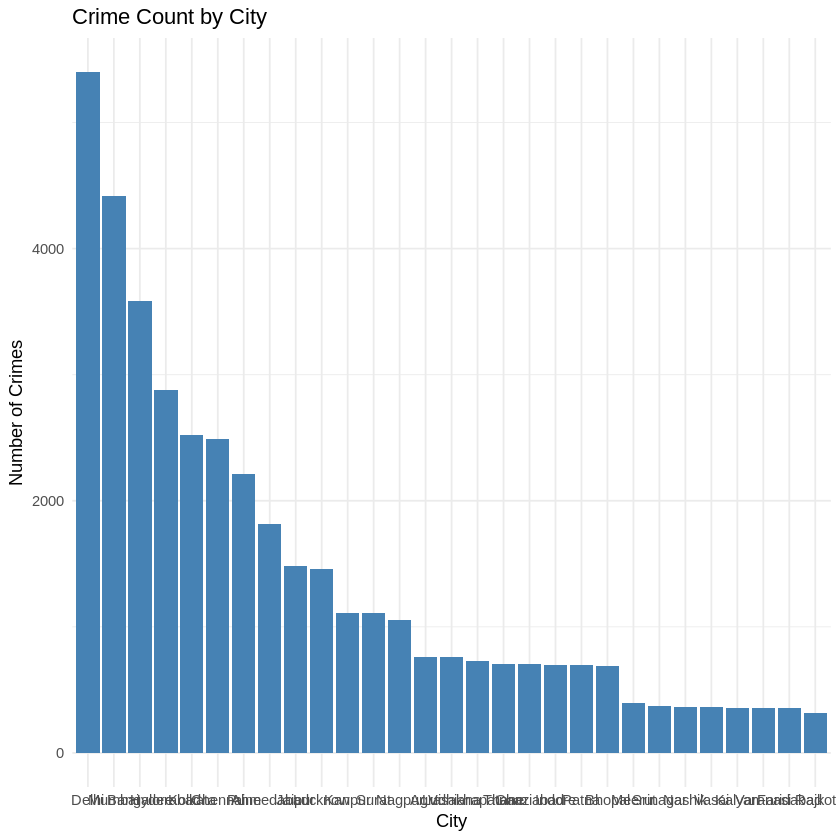

In [ ]:
crime_city <- df %>%
  group_by(City) %>%
  summarize(Count = n())

ggplot(crime_city, aes(x = reorder(City, -Count), y = Count)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Crime Count by City", x = "City", y = "Number of Crimes") +
  theme_minimal()

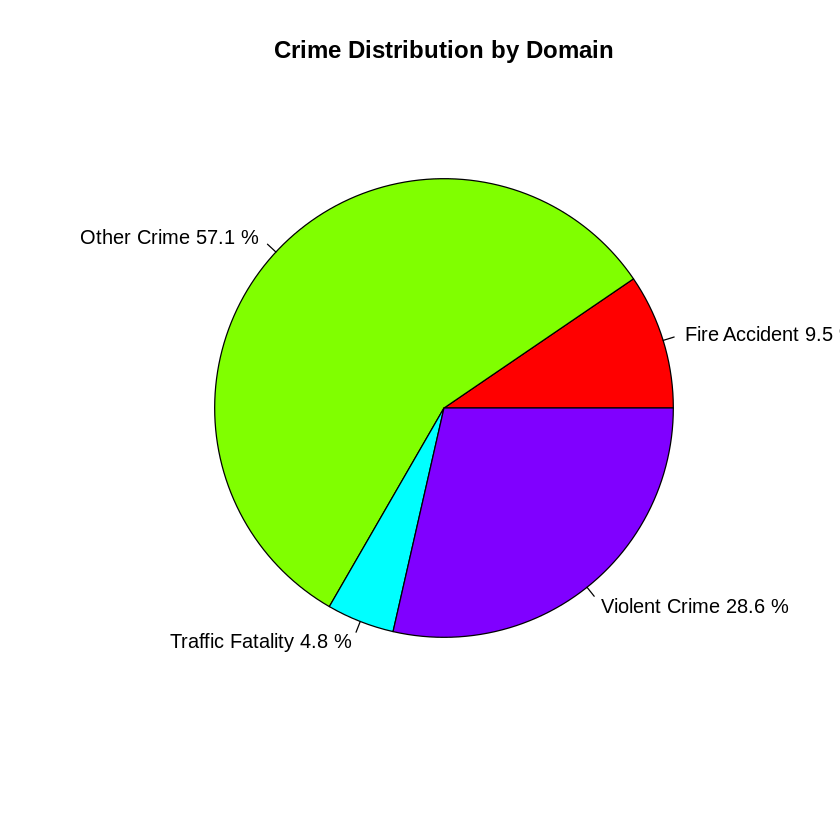

In [ ]:
crime_domain_summary <- table(df$Crime.Domain)

# Create the pie chart
pie(crime_domain_summary,
    main = "Crime Distribution by Domain",
    col = rainbow(length(crime_domain_summary)),
    labels = paste(names(crime_domain_summary), round(100 * crime_domain_summary / sum(crime_domain_summary), 1), "%")
)

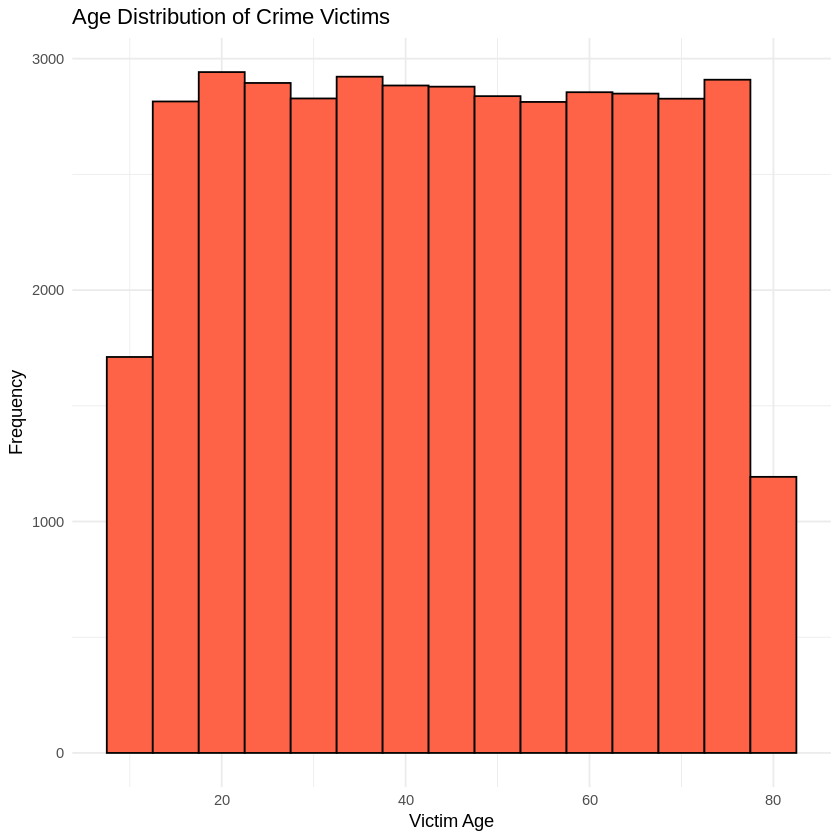

In [ ]:
ggplot(df, aes(x = Victim.Age)) +
  geom_histogram(binwidth = 5, fill = "tomato", color = "black") +
  labs(title = "Age Distribution of Crime Victims", x = "Victim Age", y = "Frequency") +
  theme_minimal()

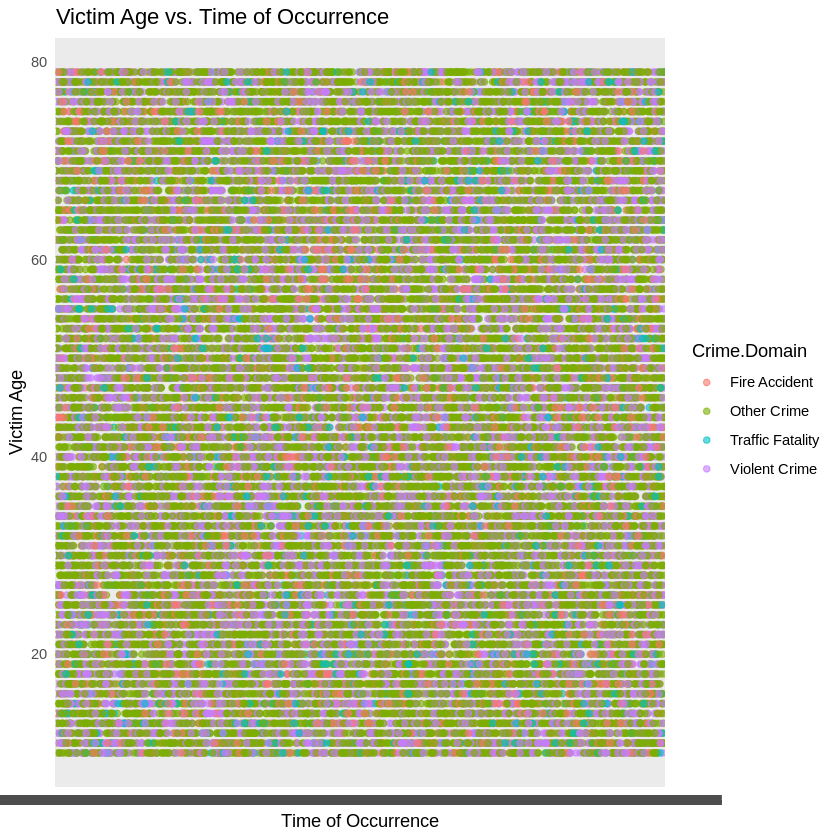

In [ ]:
# Scatter Plot: Victim Age vs. Time of Occurrence
ggplot(df, aes(x = Time.of.Occurrence, y = Victim.Age, color = Crime.Domain)) +
  geom_point(alpha = 0.6) +
  labs(title = "Victim Age vs. Time of Occurrence", x = "Time of Occurrence", y = "Victim Age") +
  theme_minimal()

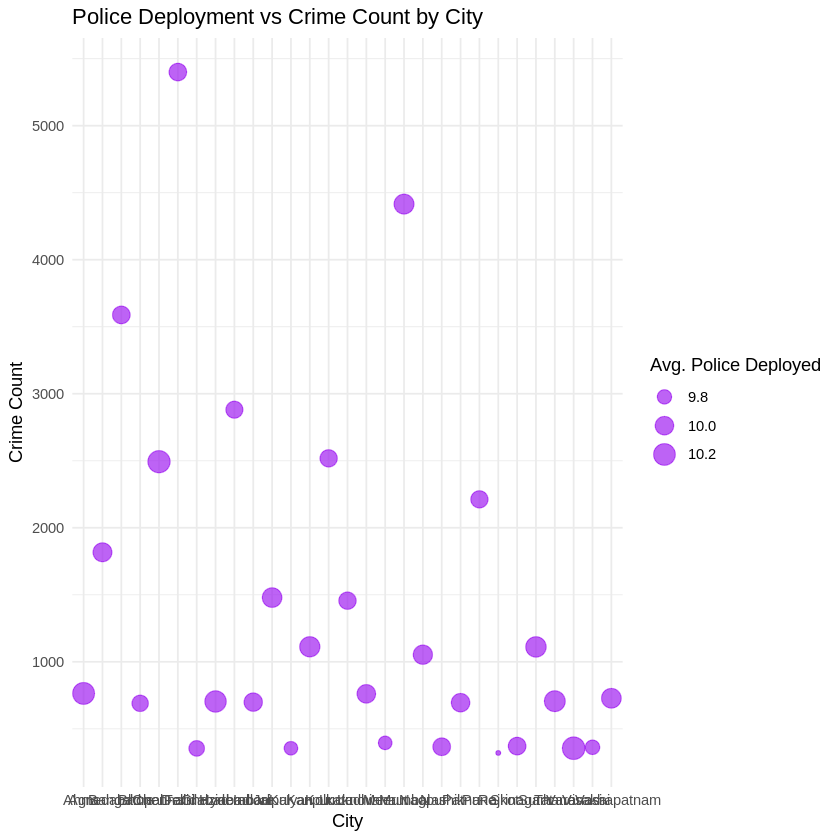

In [ ]:
# Bubble Plot: Police Deployed vs Crime Count by City
crime_bubble <- df %>%
  group_by(City) %>%
  summarize(Crime.Count = n(), Avg.Police.Deployed = mean(Police.Deployed, na.rm = TRUE))

ggplot(crime_bubble, aes(x = City, y = Crime.Count, size = Avg.Police.Deployed)) +
  geom_point(alpha = 0.7, color = "purple") +
  labs(title = "Police Deployment vs Crime Count by City", x = "City", y = "Crime Count", size = "Avg. Police Deployed") +
  theme_minimal()


##Exp 5

In [ ]:
install.packages("wordcloud")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)
library(dplyr)
library(plotly)

In [ ]:
df <- read.csv("housing_data.csv")

In [ ]:
colnames(df)

[1] "date"          "price"         "bedrooms"      "bathrooms"    
 [5] "sqft_living"   "sqft_lot"      "floors"        "waterfront"   
 [9] "view"          "condition"     "sqft_above"    "sqft_basement"
[13] "yr_built"      "yr_renovated"  "street"        "city"         
[17] "statezip"      "country"

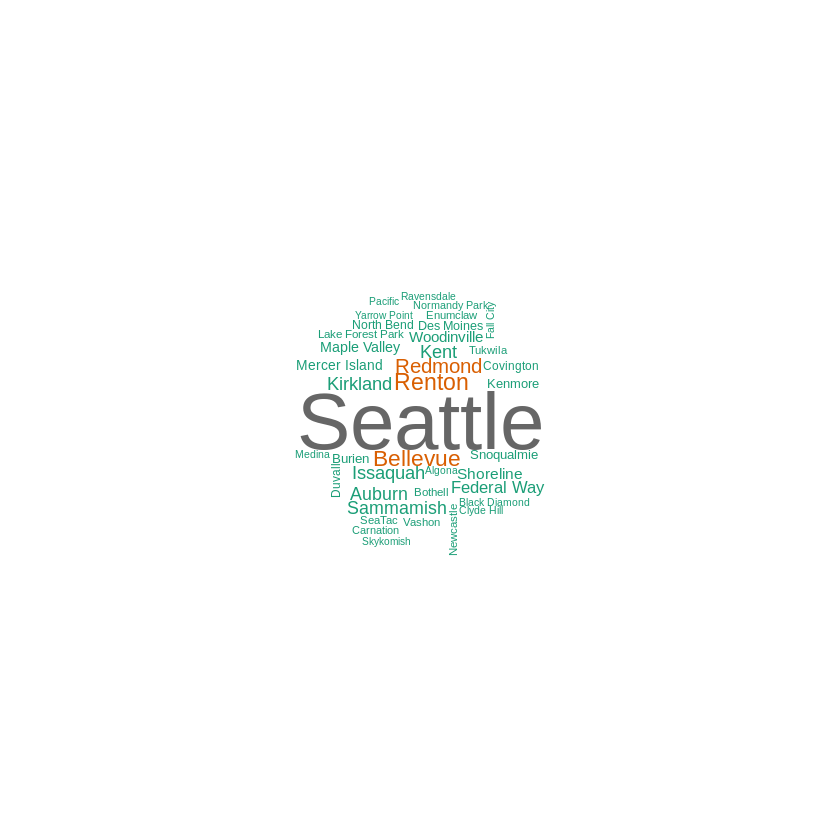

In [ ]:
library(wordcloud)
city_freq <- table(df$city)
wordcloud(names(city_freq), city_freq, random.order = FALSE, colors = brewer.pal(8, "Dark2"))
# This chart will highlight which cities have the most listings.
# Cities with larger font sizes have more housing data entries.

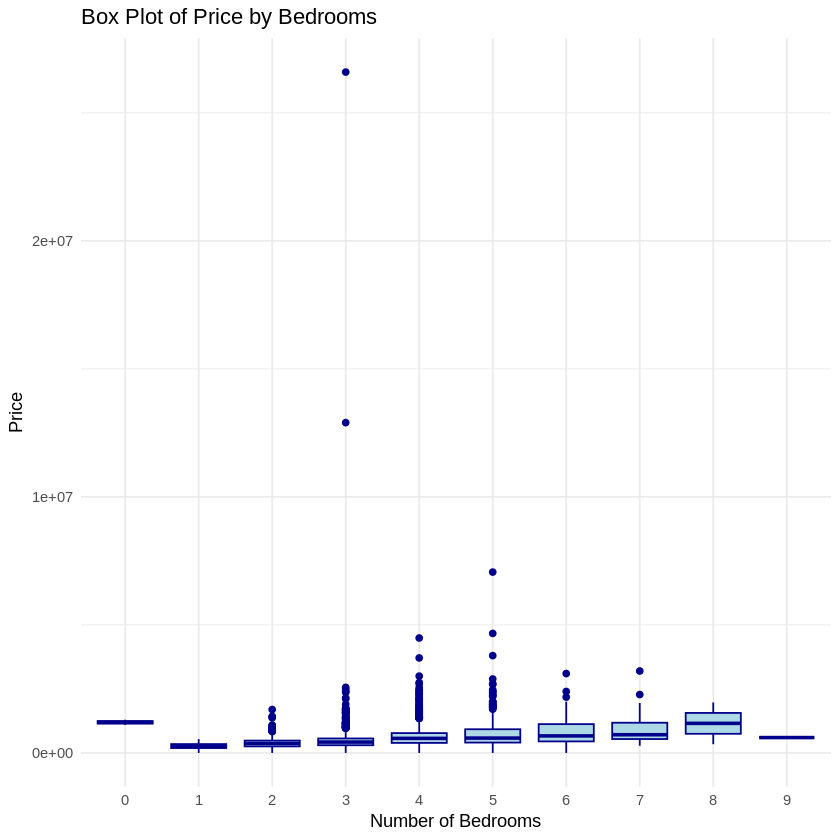

In [ ]:
ggplot(df, aes(x = as.factor(bedrooms), y = price)) +
  geom_boxplot(fill = "lightblue", color = "darkblue") +
  labs(title = "Box Plot of Price by Bedrooms", x = "Number of Bedrooms", y = "Price") +
  theme_minimal()

# The boxplot will reveal the spread of housing prices by bedroom count,
# highlighting the range, median, and potential outliers in each bedroom category.

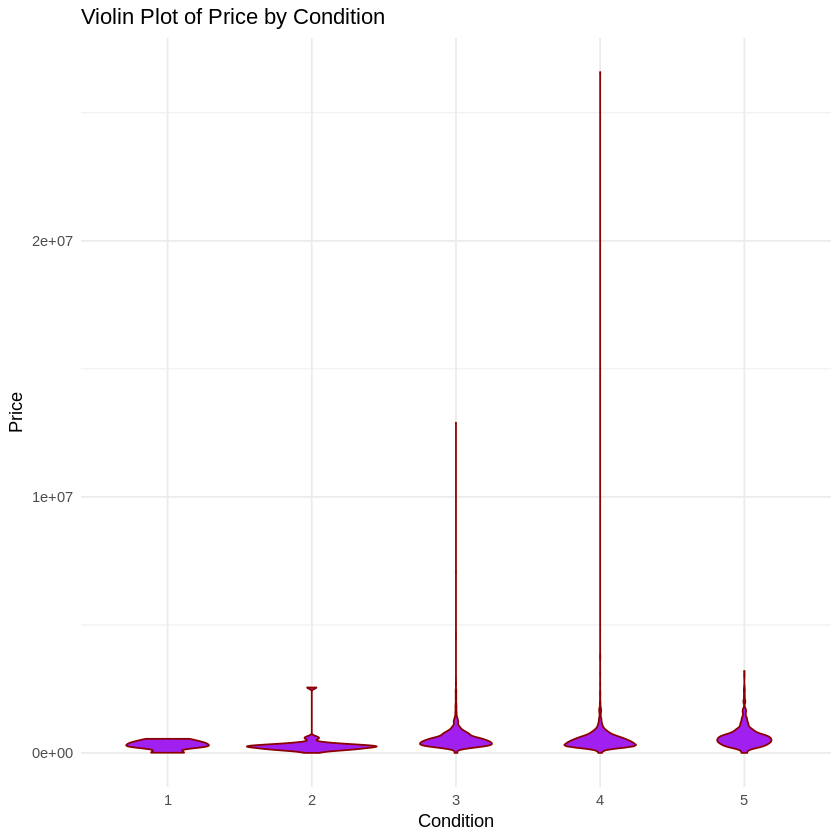

In [ ]:
ggplot(df, aes(x = as.factor(condition), y = price)) +
  geom_violin(fill = "purple", color = "darkred") +
  labs(title = "Violin Plot of Price by Condition", x = "Condition", y = "Price") +
  theme_minimal()

# The violin plot will show price distributions across different property conditions.
# Wider sections indicate higher densities, showing the range and concentration of prices in each condition.


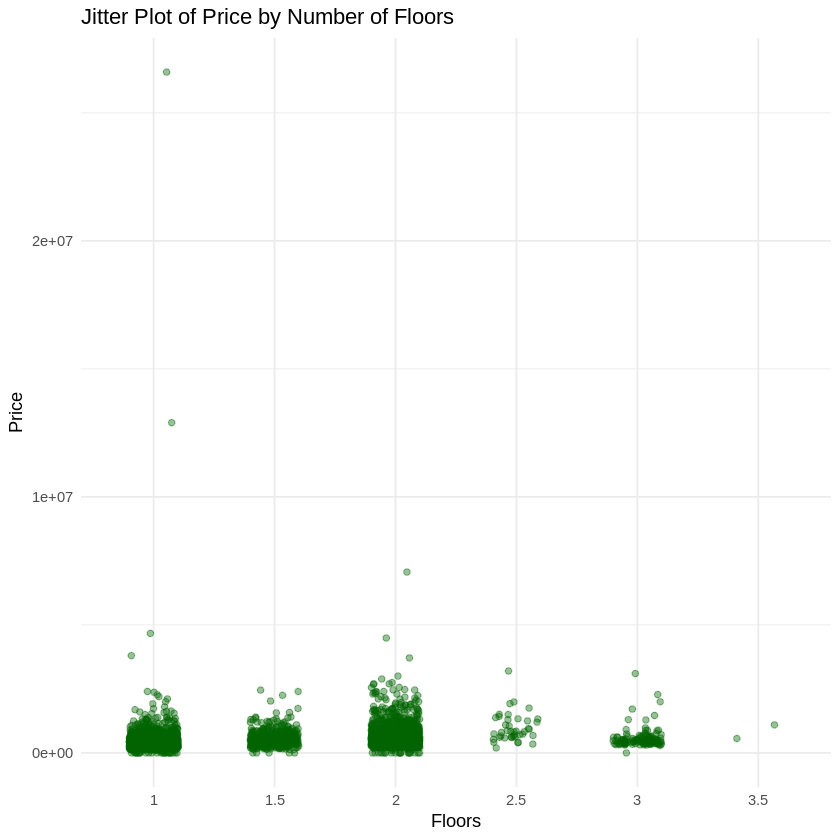

In [ ]:
ggplot(df, aes(x = as.factor(floors), y = price)) +
  geom_jitter(width = 0.2, alpha = 0.4, color = "darkgreen") +
  labs(title = "Jitter Plot of Price by Number of Floors", x = "Floors", y = "Price") +
  theme_minimal()

# The jitter plot provides a clear view of how prices are distributed by the number of floors,
# helping to spot price clusters and outliers across different floor levels.


##